In [1]:
from itertools import combinations
import matplotlib.pyplot as plt
import networkx as nx
import collections
import matplotlib as mpl
import math
import random
from community import community_louvain
import matplotlib.cm as cm
from collections import Counter

RANDOM_SEED = 10

## Baseline Data Analysis

In [2]:
g = nx.read_edgelist("amazondata.txt",create_using=nx.DiGraph(), nodetype = int)

def data_analysis(graph):
    largest_scc = max(nx.strongly_connected_components(graph), key=len)
    weakly_scc = min(nx.weakly_connected_components(graph), key=len)
    print("node count: ", graph.number_of_nodes())
    print("edge count: ",len(graph.edges()))
    print("nodes in largest scc: ",len(largest_scc))
    print("edges in largest scc: ",(len(graph.subgraph(largest_scc).edges())))
    print("nodes in largest wcc: ",len(weakly_scc))
    print("edges in largest wcc: ",(len(graph.subgraph(weakly_scc).edges())))
    print("triangles count: ",len(nx.triangles(graph.to_undirected())))
    print("avg clustering coefficient: ",nx.average_clustering(graph))
    print("node/edge ratio", graph.number_of_nodes()/len(graph.edges()))
    


In [3]:
data_analysis(g)

node count:  410236
edge count:  3356824
nodes in largest scc:  390304
edges in largest scc:  3255816
nodes in largest wcc:  410236
edges in largest wcc:  3356824
triangles count:  410236
avg clustering coefficient:  0.3543680740821862
node/edge ratio 0.12220956475525675


## Node Datum Manipulation

In [4]:
# dictionary with value left_val and key of counts
f = open("amazondata.txt", "r")
left_counts = {}
for x in f:
    if(x[0] == '#'):
        continue
    key = int(x.split('\t')[0])
    if(key in left_counts):
        left_counts[key] += 1
    else:
        left_counts[key] = 1
print(len(left_counts))

396803


In [5]:
# ratio of values less than 10 in leftcounts
c = 0
for key,value in left_counts.items():
    if value < 10:
        c += 1
print(c/len(left_counts))

0.3007336134051406


In [6]:
# dictionary with value right_val and key of counts
f = open("amazondata.txt", "r")
right_counts = {}

for x in f:
    if(x[0] == '#'):
        continue
    key = int(x.split('\t')[1].strip())
    if(key in right_counts):
        right_counts[key] += 1
    else:
        right_counts[key] = 1   
print(len(right_counts))

410235


In [7]:
# organizes right_counts into buckets
buckets = {'bucketA':0, 'bucketB':0, 'bucketC':0, 'bucketD':0, 'bucketE':0, 'bucketF':0}

for key,value in right_counts.items():
    if(value < 10):
        buckets['bucketA'] += 1
    elif(value < 20):
        buckets['bucketB'] += 1
    elif(value < 30):
        buckets['bucketC'] += 1
    elif(value < 40):
        buckets['bucketD'] += 1
    elif(value < 50):
        buckets['bucketE'] += 1
    else:
        buckets['bucketF'] += 1
print(buckets)

{'bucketA': 302415, 'bucketB': 77140, 'bucketC': 17554, 'bucketD': 5816, 'bucketE': 2654, 'bucketF': 4656}


In [8]:
f = open("amazondata.txt", "r")
counts = {}

for x in f:
    if(x[0] == '#'):
        continue
    right_key = int(x.split('\t')[1].strip())
    left_key = int(x.split('\t')[0])
    if(right_key in counts):
        counts[right_key] += 1
    else:
        counts[right_key] = 1  
    if(left_key in counts):
        counts[left_key] += 1
    else:
        counts[left_key] = 1  

In [9]:
left_buckets = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0}

for key,value in left_counts.items():

    if(value == 1):
        left_buckets['1'] += 1
    elif(value == 2):
        left_buckets['2'] += 1
    elif(value == 3):
        left_buckets['3'] += 1
    elif(value == 4):
        left_buckets['4'] += 1
    elif(value == 5):
        left_buckets['5'] += 1
    elif(value == 6):
        left_buckets['6'] += 1
    elif(value == 7):
        left_buckets['7'] += 1
    elif(value == 8):
        left_buckets['8'] += 1
    elif(value == 9):
        left_buckets['9'] += 1
    else:
        left_buckets['10'] += 1
print(left_buckets)

{'1': 11146, '2': 14935, '3': 15709, '4': 15091, '5': 13945, '6': 12599, '7': 11795, '8': 11285, '9': 12827, '10': 277471}


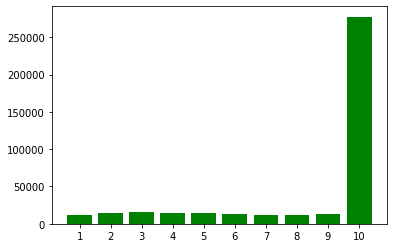

In [10]:
plt.bar(list(left_buckets.keys()), left_buckets.values(), color='g')
plt.show()


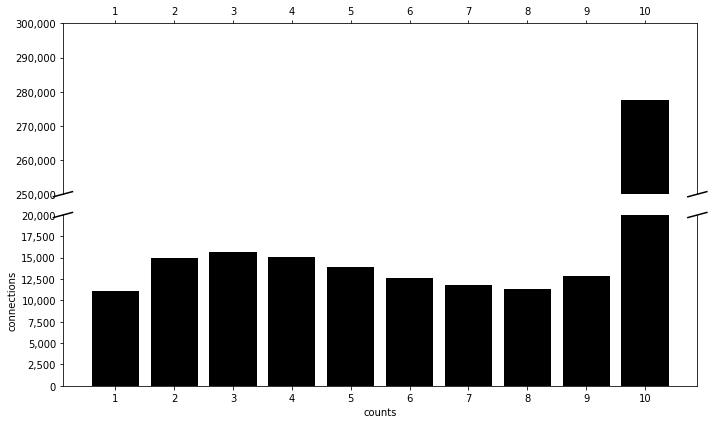

In [11]:
FIGURE_SIZE = (10,6) # (width, height)
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=FIGURE_SIZE)
ax.bar(list(left_buckets.keys()), left_buckets.values(), color='black')
ax2.bar(list(left_buckets.keys()), left_buckets.values(), color='black')
# ax2.hist(all_counts_31mer_one_WES, num_bins, facecolor='red', alpha=0.75, rwidth=0.80, label='Whole Exome')
ax.set_ylim(250000, 300000)
ax2.set_ylim(0, 20000)
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('counts')
plt.ylabel('connections')
plt.tight_layout()
# ax.legend(loc='upper right', prop={'size': 14})
# plt.savefig('Dark_Regions_31mer_Both')

In [12]:
g = nx.read_edgelist("amazondata.txt",create_using=nx.DiGraph(), nodetype = int)

Task: Create representative subgraph from your original graph. Write a method create_valid_subgraph() that takes in a networkx graph object as input and returns a list of nodes to create a subgraph from. To do so, first select a random node from your original graph. After adding this node to your subgraph node list, add all of its neighbors to the subgraph node list. Continue branching out by adding the neighbors of these neighbors to this subgraph node list. Branch out a total of 5 times to get your final list of subgraph nodes.

In [13]:
def create_valid_subgraph(nxgraph):
    random.seed(RANDOM_SEED)
    subgraph_list = []
    queue = []
    list_of_nodes = list(nxgraph.nodes())
    n1 = random.choice(list_of_nodes)
    queue.append(n1)
    while True:
        first_element = queue.pop(0)
        subgraph_list.extend(nxgraph.neighbors(first_element))
        queue.extend(nxgraph.neighbors(first_element))
        if(len(subgraph_list) > 200000):
            break
    return subgraph_list
valid_graph = create_valid_subgraph(g);
print(len(valid_graph))

200009


In [14]:
subgraph = g.subgraph(valid_graph)
data_analysis(subgraph)

node count:  5658
edge count:  37889
nodes in largest scc:  5346
edges in largest scc:  36320
nodes in largest wcc:  5658
edges in largest wcc:  37889
triangles count:  5658
avg clustering coefficient:  0.4347299811476863
node/edge ratio 0.14933094037847397


In [15]:
small_subgraph = subgraph
# nodelist = random.sample(g.nodes(), subgraphsize)
node_list = small_subgraph.nodes()
print(node_list)

[98324, 229401, 229402, 32806, 98373, 163914, 32903, 32904, 32905, 32906, 32909, 32910, 32911, 32913, 262290, 32915, 32916, 164027, 327868, 327869, 196822, 131292, 131293, 131313, 131319, 164101, 164102, 131341, 65813, 65814, 131369, 131370, 98640, 98644, 295258, 131420, 131421, 131422, 131423, 65886, 131425, 131426, 131427, 65887, 98664, 197000, 33165, 229782, 229783, 33181, 262566, 65962, 65963, 65964, 65965, 65966, 65967, 65969, 65970, 98748, 98749, 98750, 98751, 98752, 98753, 98754, 33229, 33230, 98772, 98773, 98774, 131548, 131549, 197101, 33303, 98869, 229945, 229946, 98878, 197184, 197185, 33349, 295495, 593, 594, 595, 131709, 164481, 98948, 98964, 98965, 98967, 98968, 131737, 230045, 262836, 197313, 262894, 262905, 164611, 262917, 262918, 262919, 262920, 197389, 262925, 66330, 197410, 197411, 164645, 164646, 164647, 230184, 197414, 197415, 33618, 33619, 33620, 33621, 33622, 230231, 230232, 230233, 230234, 33623, 131945, 328569, 230276, 230277, 164744, 99239, 99272, 99274, 972, 

In [16]:
comb = list(combinations(node_list, 2))
print(len(comb))

16003653


In [17]:
node_data = {}

for node_pair in list(comb):
    node_data[(node_pair[0], node_pair[1])] = []
    score = 0
    A, B = node_pair
    neighborsA = set(small_subgraph.neighbors(A))
    neighborsB = set(small_subgraph.neighbors(B))
    common_count = len(neighborsA.intersection(neighborsB))
    common_list = neighborsA.intersection(neighborsB)
    total_count = len(neighborsA.union(neighborsB))
    for z in list(common_list):
        score = score + 1/small_subgraph.degree(z)
    node_data[A, B].append(score)
    if total_count == 0:
        node_data[A, B].append(-1)
    else:
        node_data[A, B].append(common_count/total_count)  
#       first value is preferential attachment, second value is jaccard index

In [18]:
all_elements = []
for key,items in node_data.items():
    all_elements.append(items[1])
all_elements.sort(reverse=True)
print(all_elements[0:10])


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [19]:
sorted_elements = sorted(node_data.keys(), key=lambda single_key: node_data[single_key][1], reverse=True)

In [20]:
print(sorted_elements[0:10])

[(263390, 60834), (66915, 67734), (34959, 59681), (133359, 133360), (102693, 108913), (37350, 44783), (267005, 267006), (267005, 267007), (267006, 267007), (5858, 93167)]


In [21]:
t = 0
f = 0
for pair in sorted_elements[0:5000]:
    if(subgraph.has_edge(pair[0], pair[1]) == True):
#          print(pair, True)
         t = t + 1
    else:
#          print(pair, False)
         f = f + 1
print(t/(t+f)) 

0.6998


In [22]:
print(len(node_data))

16003653


Task: Create two histograms, one for preferential attachment and one for jaccard index. The x-axis is going to be the preferential attachment or jaccard index score. The y axis is going to represent how many of the pairs of nodes from node_data have this specific score.



In [23]:
pref_indexes = []
jacc_indexes = []
for key,items in node_data.items():
    if(items[0] > 0):
        pref_indexes.append(items[0])
    if(items[1] > 0):
        jacc_indexes.append(items[1])
    

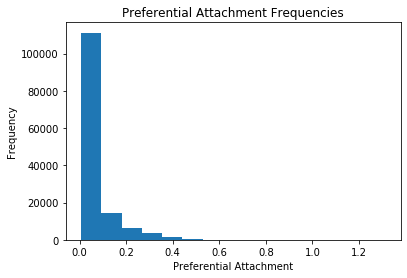

In [24]:
plt.hist(pref_indexes, 15)
plt.xlabel("Preferential Attachment")
plt.ylabel("Frequency")
plt.title("Preferential Attachment Frequencies")
plt.show
plt.savefig("pref")

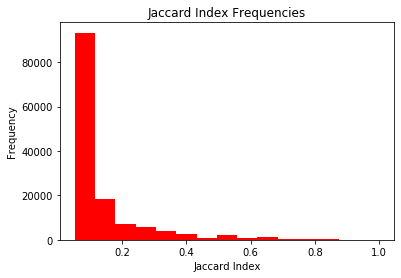

In [25]:
plt.hist(jacc_indexes, 15, color="red")
plt.xlabel("Jaccard Index")
plt.ylabel("Frequency")
plt.title("Jaccard Index Frequencies")
plt.show
plt.savefig("jaccard")


In [26]:
pref_greater = 0
pref_less = 0
jacc_greater = 0
jacc_less = 0
for key,items in node_data.items():
    if(items[0] > 0.4):
        pref_greater = pref_greater + 1
    if(items[0] <= 0.4):
        pref_less = pref_less + 1
    if(items[1] > 0.4):
        jacc_greater = jacc_greater + 1
    if(items[1] <= 0.4):
        jacc_less = jacc_less + 1

print(pref_greater/(pref_greater+pref_less), jacc_greater/(jacc_greater+jacc_less))
        


7.148367938245099e-05 0.0004782658059381817


In [27]:

#first compute the best partition
partition = community_louvain.best_partition(subgraph.to_undirected())

# compute the best partition
partition = community_louvain.best_partition(subgraph.to_undirected())

# # draw the graph
# pos = nx.spring_layout(G)
# # color the nodes according to their partition
# cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
# nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
#                        cmap=cmap, node_color=list(partition.values()))
# nx.draw_networkx_edges(G, pos, alpha=0.5)
# plt.show()

In [28]:
print(partition)

{98324: 0, 229401: 1, 229402: 1, 32806: 2, 98373: 3, 163914: 3, 32903: 4, 32904: 4, 32905: 4, 32906: 4, 32909: 2, 32910: 2, 32911: 2, 32913: 2, 262290: 5, 32915: 2, 32916: 2, 164027: 1, 327868: 1, 327869: 1, 196822: 1, 131292: 6, 131293: 6, 131313: 7, 131319: 0, 164101: 8, 164102: 9, 131341: 0, 65813: 10, 65814: 6, 131369: 1, 131370: 1, 98640: 1, 98644: 1, 295258: 0, 131420: 11, 131421: 11, 131422: 11, 131423: 11, 65886: 12, 131425: 11, 131426: 11, 131427: 11, 65887: 12, 98664: 6, 197000: 13, 33165: 7, 229782: 14, 229783: 14, 33181: 15, 262566: 8, 65962: 1, 65963: 1, 65964: 1, 65965: 1, 65966: 1, 65967: 1, 65969: 1, 65970: 1, 98748: 16, 98749: 16, 98750: 16, 98751: 16, 98752: 16, 98753: 16, 98754: 17, 33229: 1, 33230: 1, 98772: 4, 98773: 4, 98774: 4, 131548: 18, 131549: 18, 197101: 0, 33303: 4, 98869: 10, 229945: 1, 229946: 1, 98878: 19, 197184: 20, 197185: 20, 33349: 8, 295495: 5, 593: 6, 594: 6, 595: 6, 131709: 6, 164481: 8, 98948: 4, 98964: 3, 98965: 3, 98967: 3, 98968: 3, 131737: 2

<function matplotlib.pyplot.show(*args, **kw)>

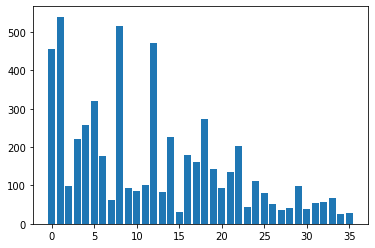

In [29]:
community_count = Counter(partition.values())
communities = []
counts = []
for key,value in community_count.items():
    communities.append(key)
    counts.append(value)
plt.bar(communities, counts)
plt.show

In [30]:
community_constant = 0.2
node_data = {}

def sameComm(node1, node2, partition):
    return partition[node1] == partition[node2]
    
for node_pair in list(comb):
    node_data[(node_pair[0], node_pair[1])] = []
    score = 0
    A, B = node_pair
    neighborsA = set(small_subgraph.neighbors(A))
    neighborsB = set(small_subgraph.neighbors(B))
    common_count = len(neighborsA.intersection(neighborsB))
    common_list = neighborsA.intersection(neighborsB)
    total_count = len(neighborsA.union(neighborsB))
    for z in list(common_list):
        score = score + 1/small_subgraph.degree(z)
    if(sameComm(A, B, partition)):
#       adding constant to pref index
        score = score + community_constant
    node_data[A, B].append(score)
    if total_count == 0:
        node_data[A, B].append(-1)
    else:
        jacc_index = common_count / total_count
        if(sameComm(A, B, partition)):
            jacc_index = jacc_index + community_constant
        node_data[A, B].append(jacc_index)
#       first value is preferential attachment, second value is jaccard index


In [31]:
pref_indexes = []
jacc_indexes = []
for key,items in node_data.items():
    if(items[0] > 0):
        pref_indexes.append(items[0])
    if(items[1] > 0):
        jacc_indexes.append(items[1])

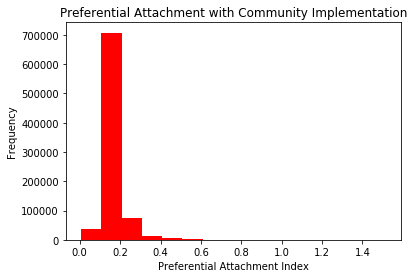

In [32]:
plt.hist(pref_indexes, 15, color="red")
plt.xlabel("Preferential Attachment Index")
plt.ylabel("Frequency")
plt.title("Preferential Attachment with Community Implementation")
plt.show
plt.savefig("preferential_community")


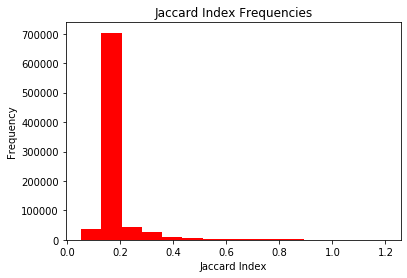

In [33]:
plt.hist(jacc_indexes, 15, color="red")
plt.xlabel("Jaccard Index")
plt.ylabel("Frequency")
plt.title("Jaccard Index Frequencies")
plt.show
plt.savefig("jaccard_community")
# a lot of nodes share the same communities, making them likelier to be closer together on the jacc index

## ML Analysis

the goal is to best reccomend products based on adapted distance metrics while also assessing the network with regular distance metrics.

In [34]:
len(subgraph.edges)

37889

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(list(subgraph.edges()), test_size=0.2, random_state=RANDOM_SEED)

In [36]:
print(len(X_train), len(X_test))

30311 7578


In [37]:
X_subgraph = subgraph.edge_subgraph(list(subgraph.edges()))

In [ ]:
node_data_train_comm = {}
node_data_train = {}

for node_pair in list(comb):
    node_data_train_comm[(node_pair[0], node_pair[1])] = []
    node_data_train[(node_pair[0], node_pair[1])] = []

    score = 0
    A, B = node_pair
    neighborsA = set(X_subgraph.neighbors(A))
    neighborsB = set(X_subgraph.neighbors(B))
    common_count = len(neighborsA.intersection(neighborsB))
    common_list = neighborsA.intersection(neighborsB)
    total_count = len(neighborsA.union(neighborsB))
    for z in list(common_list):
        score = score + 1/X_subgraph.degree(z)
    node_data_train[A, B].append(score)
    if total_count == 0:
        node_data_train[A, B].append(-1)
    else:
        node_data_train[A, B].append(common_count/total_count)  
#       first value is preferential attachment, second value is jaccard index


In [ ]:
pref_indexes_train = []
jacc_indexes_train = []
for key,items in node_data_train.items():
    if(items[0] > 0):
        pref_indexes_train.append(items[0])
    if(items[1] > 0):
        jacc_indexes_train.append(items[1])

In [ ]:
plt.hist(pref_indexes_train, 15, color="blue")
plt.xlabel("Preferential Attachment")
plt.ylabel("Frequency")
plt.title("Preferential Attachment Frequencies on Training Subgraph")
plt.show
plt.savefig("pref_train")


In [ ]:
plt.hist(jacc_indexes_train, 15, color="red")
plt.xlabel("Jaccard Index")
plt.ylabel("Frequency")
plt.title("Jaccard Index Frequencies on Training Subgraph")
plt.show
plt.savefig("jaccard_train")


In [ ]:
sorted_elements_trained = sorted(node_data_train.keys(), key=lambda single_key: node_data_train[single_key][1], reverse=True)

In [ ]:
top_trained_jaccard = sorted_elements_trained[:int(0.1*len(sorted_elements_trained))]

In [ ]:
partition = community_louvain.best_partition(X_subgraph.to_undirected())
community_count = Counter(partition.values())
communities = []
counts = []
for key,value in community_count.items():
    communities.append(key)
    counts.append(value)
plt.bar(communities, counts)
plt.show

In [ ]:
community_constant = 0.2
node_data_train_comm = {}

def sameComm(node1, node2, partition):
    return partition[node1] == partition[node2]
    
for node_pair in list(comb):
    node_data_train_comm[(node_pair[0], node_pair[1])] = []
    score = 0
    A, B = node_pair
    neighborsA = set(X_subgraph.neighbors(A))
    neighborsB = set(X_subgraph.neighbors(B))
    common_count = len(neighborsA.intersection(neighborsB))
    common_list = neighborsA.intersection(neighborsB)
    total_count = len(neighborsA.union(neighborsB))
    for z in list(common_list):
        score = score + 1/X_subgraph.degree(z)
    if(sameComm(A, B, partition)):
#       adding constant to pref index
        score = score + community_constant
    node_data_train_comm[A, B].append(score)
    if total_count == 0:
        node_data_train_comm[A, B].append(-1)
    else:
        jacc_index = common_count / total_count
        if(sameComm(A, B, partition)):
            jacc_index = jacc_index + community_constant
        node_data_train_comm[A, B].append(jacc_index)
#       first value is preferential attachment, second value is jaccard index



In [ ]:
pref_indexes_train_comm = []
jacc_indexes_train_comm = []
for key,items in node_data_train_comm.items():
    if(items[0] > 0):
        pref_indexes_train_comm.append(items[0])
    if(items[1] > 0):
        jacc_indexes_train_comm.append(items[1])

In [ ]:
plt.hist(pref_indexes_train, 15, color="blue")
plt.xlabel("Preferential Attachment")
plt.ylabel("Frequency")
plt.title("Preferential Attachment Frequencies on Training Subgraph WITH Communities")
plt.show
plt.savefig("pref_train_COMM")
plt.hist(jacc_indexes_train, 15, color="red")
plt.xlabel("Jaccard Index")
plt.ylabel("Frequency")
plt.title("Jaccard Index Frequencies on Training Subgraph WITH Communities")
plt.show
plt.savefig("jaccard_train_COMM")